                 Open       High        Low    Volume      Close  Adj Close
Date                                                                       
2010-06-29  19.000000  25.000000  17.540001  18766300  23.889999  23.889999
2010-06-30  25.790001  30.420000  23.299999  17187100  23.830000  23.830000
2010-07-01  25.000000  25.920000  20.270000   8218800  21.959999  21.959999
2010-07-02  23.000000  23.100000  18.709999   5139800  19.200001  19.200001
2010-07-06  20.000000  20.000000  15.830000   6866900  16.110001  16.110001
2010-07-07  16.400000  16.629999  14.980000   6921700  15.800000  15.800000
2010-07-08  16.139999  17.520000  15.570000   7711400  17.459999  17.459999
2010-07-09  17.580000  17.900000  16.549999   4050600  17.400000  17.400000
2010-07-12  17.950001  18.070000  17.000000   2202500  17.049999  17.049999
2010-07-13  17.389999  18.639999  16.900000   2680100  18.139999  18.139999


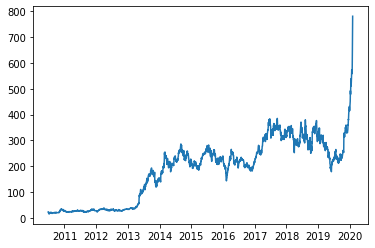

In [5]:
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Flatten, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('TSLA.csv', parse_dates=['Date'], index_col=['Date'])

print(data.head(10))
plt.plot(data['Close'])

In [39]:
x = data[list(data.columns[0:4])]
y = data[list(data.columns[4:5])]
scale = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
samp_x_train = x_train
samp_x_test = x_test
samp_y_train = y_train
samp_y_test = y_test
print(samp_y_train)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_train

                 Close
Date                  
2010-09-02   21.059999
2011-05-16   26.600000
2018-05-11  301.059998
2013-07-08  121.610001
2013-04-22   50.189999
...                ...
2015-04-08  207.669998
2013-03-21   36.009998
2015-05-07  236.800003
2015-02-06  217.360001
2011-05-26   29.480000

[1932 rows x 1 columns]


array([[[-1.39855241],
        [-1.39310726],
        [-1.39250352],
        [-1.01798166]],

       [[-1.33459465],
        [-1.33749707],
        [-1.33930472],
        [-0.96448956]],

       [[ 1.01312565],
        [ 0.97662874],
        [ 0.98413542],
        [-0.18303895]],

       ...,

       [[ 0.28541706],
        [ 0.38839634],
        [ 0.3120745 ],
        [ 0.76816841]],

       [[ 0.29381047],
        [ 0.27239756],
        [ 0.28010407],
        [-0.46896077]],

       [[-1.32762812],
        [-1.32291484],
        [-1.32609027],
        [-0.45043968]]])

In [16]:
def create_model():
    model = Sequential()
    model.add(LSTM(20, input_shape=(4,1), return_sequences=False))
    #model.add(Dense(25, activation = 'linear'))
    #model.add(Dropout(0.05))
    model.add(Dense(10, activation = 'linear'))
    model.add(Dense(5, activation = 'linear'))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

Train on 1932 samples, validate on 484 samples
Epoch 1/500
1932/1932 - 5s - loss: 48715.9233 - mse: 48715.9258 - val_loss: 46918.2862 - val_mse: 46918.2852
Epoch 2/500
1932/1932 - 1s - loss: 43884.4318 - mse: 43884.4336 - val_loss: 36279.1663 - val_mse: 36279.1602
Epoch 3/500
1932/1932 - 1s - loss: 28145.6030 - mse: 28145.6016 - val_loss: 18111.5280 - val_mse: 18111.5273
Epoch 4/500
1932/1932 - 1s - loss: 11922.3992 - mse: 11922.3975 - val_loss: 5823.0623 - val_mse: 5823.0620
Epoch 5/500
1932/1932 - 1s - loss: 4512.7704 - mse: 4512.7705 - val_loss: 2706.4383 - val_mse: 2706.4377
Epoch 6/500
1932/1932 - 1s - loss: 2997.7284 - mse: 2997.7283 - val_loss: 2001.6687 - val_mse: 2001.6688
Epoch 7/500
1932/1932 - 1s - loss: 2080.0783 - mse: 2080.0784 - val_loss: 1101.4779 - val_mse: 1101.4779
Epoch 8/500
1932/1932 - 1s - loss: 1311.9241 - mse: 1311.9242 - val_loss: 680.0024 - val_mse: 680.0024
Epoch 9/500
1932/1932 - 1s - loss: 972.7528 - mse: 972.7528 - val_loss: 509.7486 - val_mse: 509.7486


Epoch 83/500
1932/1932 - 1s - loss: 19.9672 - mse: 19.9672 - val_loss: 17.6163 - val_mse: 17.6163
Epoch 84/500
1932/1932 - 1s - loss: 19.1514 - mse: 19.1514 - val_loss: 20.1056 - val_mse: 20.1056
Epoch 85/500
1932/1932 - 1s - loss: 19.4787 - mse: 19.4787 - val_loss: 17.4070 - val_mse: 17.4070
Epoch 86/500
1932/1932 - 1s - loss: 18.8813 - mse: 18.8813 - val_loss: 17.5665 - val_mse: 17.5665
Epoch 87/500
1932/1932 - 1s - loss: 17.6119 - mse: 17.6119 - val_loss: 18.8000 - val_mse: 18.8000
Epoch 88/500
1932/1932 - 1s - loss: 19.6463 - mse: 19.6463 - val_loss: 22.3601 - val_mse: 22.3601
Epoch 89/500
1932/1932 - 1s - loss: 19.2890 - mse: 19.2890 - val_loss: 23.4115 - val_mse: 23.4115
Epoch 90/500
1932/1932 - 1s - loss: 19.2783 - mse: 19.2783 - val_loss: 18.0816 - val_mse: 18.0816
Epoch 91/500
1932/1932 - 1s - loss: 17.9934 - mse: 17.9934 - val_loss: 17.7935 - val_mse: 17.7935
Epoch 92/500
1932/1932 - 1s - loss: 18.1175 - mse: 18.1175 - val_loss: 17.5528 - val_mse: 17.5528
Epoch 93/500
1932/19

Epoch 166/500
1932/1932 - 1s - loss: 14.1549 - mse: 14.1549 - val_loss: 15.9807 - val_mse: 15.9807
Epoch 167/500
1932/1932 - 1s - loss: 14.2388 - mse: 14.2388 - val_loss: 14.2318 - val_mse: 14.2318
Epoch 168/500
1932/1932 - 1s - loss: 14.1472 - mse: 14.1472 - val_loss: 14.5877 - val_mse: 14.5877
Epoch 169/500
1932/1932 - 1s - loss: 14.6068 - mse: 14.6068 - val_loss: 15.3895 - val_mse: 15.3895
Epoch 170/500
1932/1932 - 1s - loss: 14.0847 - mse: 14.0847 - val_loss: 19.7119 - val_mse: 19.7119
Epoch 171/500
1932/1932 - 1s - loss: 13.7323 - mse: 13.7323 - val_loss: 14.9839 - val_mse: 14.9839
Epoch 172/500
1932/1932 - 1s - loss: 14.1281 - mse: 14.1281 - val_loss: 14.5099 - val_mse: 14.5099
Epoch 173/500
1932/1932 - 1s - loss: 14.2460 - mse: 14.2460 - val_loss: 15.8574 - val_mse: 15.8574
Epoch 174/500
1932/1932 - 1s - loss: 13.4552 - mse: 13.4552 - val_loss: 15.1657 - val_mse: 15.1657
Epoch 175/500
1932/1932 - 1s - loss: 14.6791 - mse: 14.6791 - val_loss: 14.6835 - val_mse: 14.6835
Epoch 176/

Epoch 249/500
1932/1932 - 1s - loss: 10.8251 - mse: 10.8251 - val_loss: 17.9280 - val_mse: 17.9280
Epoch 250/500
1932/1932 - 1s - loss: 11.0771 - mse: 11.0771 - val_loss: 11.7019 - val_mse: 11.7019
Epoch 251/500
1932/1932 - 1s - loss: 11.6356 - mse: 11.6356 - val_loss: 14.5144 - val_mse: 14.5144
Epoch 252/500
1932/1932 - 1s - loss: 11.2239 - mse: 11.2239 - val_loss: 11.1651 - val_mse: 11.1651
Epoch 253/500
1932/1932 - 1s - loss: 10.2595 - mse: 10.2595 - val_loss: 11.0863 - val_mse: 11.0863
Epoch 254/500
1932/1932 - 1s - loss: 10.9404 - mse: 10.9404 - val_loss: 11.4949 - val_mse: 11.4949
Epoch 255/500
1932/1932 - 1s - loss: 10.5255 - mse: 10.5255 - val_loss: 10.8770 - val_mse: 10.8770
Epoch 256/500
1932/1932 - 1s - loss: 10.6339 - mse: 10.6339 - val_loss: 11.1341 - val_mse: 11.1341
Epoch 257/500
1932/1932 - 1s - loss: 10.0808 - mse: 10.0808 - val_loss: 10.7182 - val_mse: 10.7182
Epoch 258/500
1932/1932 - 1s - loss: 10.4783 - mse: 10.4783 - val_loss: 11.0461 - val_mse: 11.0461
Epoch 259/

1932/1932 - 1s - loss: 6.1810 - mse: 6.1810 - val_loss: 7.5965 - val_mse: 7.5965
Epoch 335/500
1932/1932 - 1s - loss: 7.2295 - mse: 7.2295 - val_loss: 12.1431 - val_mse: 12.1431
Epoch 336/500
1932/1932 - 1s - loss: 8.1866 - mse: 8.1866 - val_loss: 7.3627 - val_mse: 7.3627
Epoch 337/500
1932/1932 - 1s - loss: 6.5259 - mse: 6.5259 - val_loss: 6.4163 - val_mse: 6.4163
Epoch 338/500
1932/1932 - 1s - loss: 6.4527 - mse: 6.4527 - val_loss: 9.2583 - val_mse: 9.2583
Epoch 339/500
1932/1932 - 1s - loss: 6.9857 - mse: 6.9857 - val_loss: 7.2702 - val_mse: 7.2702
Epoch 340/500
1932/1932 - 1s - loss: 6.2821 - mse: 6.2821 - val_loss: 6.6731 - val_mse: 6.6731
Epoch 341/500
1932/1932 - 1s - loss: 6.1435 - mse: 6.1435 - val_loss: 6.3041 - val_mse: 6.3041
Epoch 342/500
1932/1932 - 1s - loss: 6.1102 - mse: 6.1102 - val_loss: 7.7823 - val_mse: 7.7823
Epoch 343/500
1932/1932 - 1s - loss: 7.5561 - mse: 7.5561 - val_loss: 6.2747 - val_mse: 6.2747
Epoch 344/500
1932/1932 - 1s - loss: 6.8567 - mse: 6.8567 - va

Epoch 421/500
1932/1932 - 1s - loss: 5.8882 - mse: 5.8882 - val_loss: 6.3635 - val_mse: 6.3635
Epoch 422/500
1932/1932 - 1s - loss: 5.2751 - mse: 5.2751 - val_loss: 6.1701 - val_mse: 6.1701
Epoch 423/500
1932/1932 - 1s - loss: 5.7402 - mse: 5.7402 - val_loss: 5.7312 - val_mse: 5.7312
Epoch 424/500
1932/1932 - 1s - loss: 5.2106 - mse: 5.2106 - val_loss: 5.8881 - val_mse: 5.8881
Epoch 425/500
1932/1932 - 1s - loss: 6.1718 - mse: 6.1718 - val_loss: 5.8842 - val_mse: 5.8842
Epoch 426/500
1932/1932 - 1s - loss: 5.9264 - mse: 5.9264 - val_loss: 5.9012 - val_mse: 5.9012
Epoch 427/500
1932/1932 - 1s - loss: 5.4467 - mse: 5.4467 - val_loss: 5.3815 - val_mse: 5.3815
Epoch 428/500
1932/1932 - 1s - loss: 5.8862 - mse: 5.8862 - val_loss: 7.7374 - val_mse: 7.7374
Epoch 429/500
1932/1932 - 1s - loss: 5.6348 - mse: 5.6348 - val_loss: 7.5651 - val_mse: 7.5651
Epoch 430/500
1932/1932 - 1s - loss: 5.3062 - mse: 5.3062 - val_loss: 7.7404 - val_mse: 7.7404
Epoch 431/500
1932/1932 - 1s - loss: 5.9621 - mse:

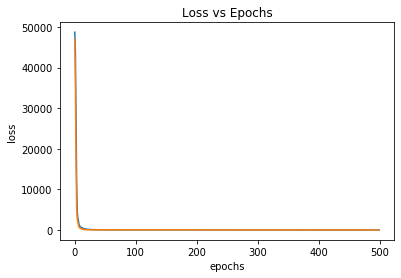

In [17]:
clf = create_model()
#estimator = KerasRegressor(build_fn=create_model, epochs=10, verbose = 2)
model = clf.fit(x_train, y_train, batch_size = 32, epochs = 500, verbose = 2, validation_data = (x_test,y_test))
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.show()

/Users/dev/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


                 Close
Date                  
2010-06-29   31.879662
2010-06-30   33.281883
2010-07-01   23.941662
2010-07-02   21.457767
2010-07-06   18.882267
...                ...
2020-01-28  568.362976
2020-01-29  580.715637
2020-01-30  637.205017
2020-01-31  645.393616
2020-02-03  773.043701

[2416 rows x 1 columns]


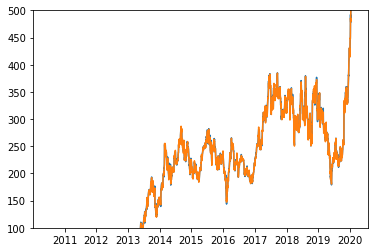

In [18]:
trainPredict = clf.predict(x_train)
testPredict = clf.predict(x_test)
df = pd.DataFrame(data = trainPredict, columns=['data'])
df1 = pd.DataFrame(data = testPredict, columns=['data'])
for i in range(0,len(samp_y_train)):
    samp_y_train['Close'][i] = df['data'][i]
for i in range(0,len(samp_y_test)):
    samp_y_test['Close'][i] = df1['data'][i]
overall = pd.concat([samp_y_train, samp_y_test])
overall = overall.sort_index()
print(overall)
axes = plt.gca()
axes.set_ylim([100,500])
plt.plot(data['Close'])
plt.plot(overall['Close'])

In [23]:
test = np.array([[816, 832.5, 796, 12254580]])
test = scale.transform(test)
temp = test.reshape((test.shape[0], test.shape[1], 1))
ans = clf.predict(temp)
ans

array([[804.2796]], dtype=float32)

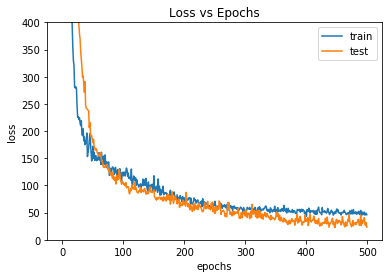

In [293]:
axes = plt.gca()
axes.set_ylim([0,400])
plt.plot(model.history['loss'], label = 'train')
plt.plot(model.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.legend(loc="upper right")
plt.show()

In [58]:
fdata = pd.read_csv('fdata.csv', parse_dates=['Date'], index_col=['Date'])
fdata = fdata.dropna()
print(fdata)
feature = fdata[list(fdata.columns[0:4])]
label = fdata[list(fdata.columns[4:5])]
tempLabel = label

              Open    High     Low      Volume   Close
Date                                                  
2020-01-06  440.47  451.56  440.00  10157500.0  451.54
2020-01-07  461.40  471.63  453.36  18209140.0  469.06
2020-01-08  473.70  498.49  468.23  31199390.0  492.14
2020-01-09  497.10  498.80  472.87  28463190.0  481.34
2020-01-10  481.79  484.94  473.70  12976830.0  478.15
...            ...     ...     ...         ...     ...
2020-05-19  815.17  822.07  806.08   9636522.0  808.01
2020-05-20  820.50  826.00  811.80   7309271.0  815.56
2020-05-21  816.00  832.50  796.00  12254580.0  827.60
2020-05-22  822.17  831.78  812.00   9987475.0  816.88
2020-05-26  834.50  834.60  815.71   8089736.0  818.87

[98 rows x 5 columns]


In [59]:
temp = np.array(feature)
temp = scale.transform(temp)
temp = temp.reshape((temp.shape[0], temp.shape[1], 1))
ans = clf.predict(temp)

In [60]:
df = pd.DataFrame(data = ans, columns=['data'])
for i in range(0,len(tempLabel)):
    tempLabel[' Close'][i] = df['data'][i]
tempLabel

/Users/dev/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Close
Date,
2020-01-06,447.111572
2020-01-07,463.714630
2020-01-08,485.040558
2020-01-09,481.824646
2020-01-10,478.552917
...,...
2020-05-19,802.078735
2020-05-20,803.270569
2020-05-21,803.548035


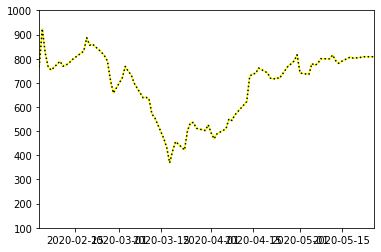

In [90]:
from datetime import datetime
%matplotlib inline
axes = plt.gca()
plt.plot(overall['Close'])
plt.plot(label[' Close'],color ='yellow')
plt.plot(tempLabel[' Close'], color ='black', linestyle = 'dotted')
datemin = datetime(2020,2,3)
datemax = datetime(2020,5,26) 
axes.set_ylim([100,1000])
axes.set_xlim(datemin,datemax)
plt.show()